<a href="https://colab.research.google.com/github/egyvedriyanto78/Deep-Learning/blob/main/YOLOv7_TACO_garbage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dan import Roboflow
!pip install -q roboflow
from roboflow import Roboflow

# Inisialisasi Roboflow dengan API key
rf = Roboflow(api_key="pyJdTQUxOgmebewY8nb3")
project = rf.workspace("divya-lzcld").project("taco-mqclx")
version = project.version(3)
dataset = version.download("yolov5")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO-3 in yolov5pytorch:: 100%|██████████| 12020/12020 [00:01<00:00, 6754.71it/s]


In [2]:
!git clone https://github.com/WongKinYiu/yolov7.git
%cd yolov7
!pip install -r requirements.txt

Cloning into 'yolov7'...
remote: Enumerating objects: 1197, done.
remote: Total 1197 (delta 0), reused 0 (delta 0), pack-reused 1197 (from 1)
Receiving objects: 100% (1197/1197), 74.23 MiB | 21.27 MiB/s, done.
Resolving deltas: 100% (519/519), done.
/content/yolov7
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.19 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
albumentations 1.4.20 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
bigframes 1.25.0 requires numpy>=1.24.0, but you have numpy 1.23.5 w

In [3]:
# Cek struktur direktori dataset
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [6]:
# Train yolo
!python train.py --weights 'yolov7.pt' --data '/content/TACO-3/data.yaml' --epochs 10 --batch-size 16 --img-size 640

2024-11-02 13:11:37.099754: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-02 13:11:37.119456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-02 13:11:37.126679: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 13:11:37.144709: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-02 13:11:38.230813: W tensorflow/comp

In [8]:
!python test.py --weights 'runs/train/exp3/weights/best.pt' --data '/content/TACO-3/data.yaml' --img-size 640 --batch-size 16

Namespace(weights=['runs/train/exp3/weights/best.pt'], data='/content/TACO-3/data.yaml', batch_size=16, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitr

In [10]:
!python detect.py --weights 'runs/train/exp3/weights/best.pt' --source '/content/TACO-3/test/images' --img-size 640 --conf-thres 0.5

Namespace(weights=['runs/train/exp3/weights/best.pt'], source='/content/TACO-3/test/images', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.5.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

/content/yolov7/models/experimental.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be a

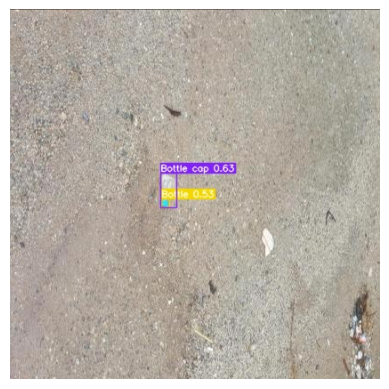

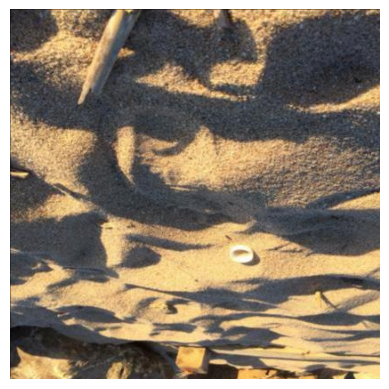

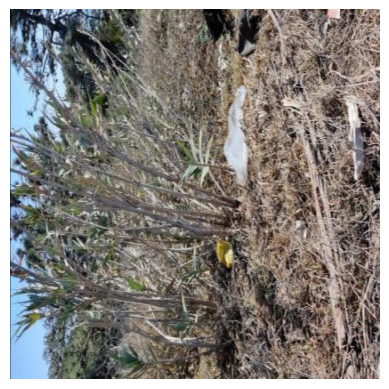

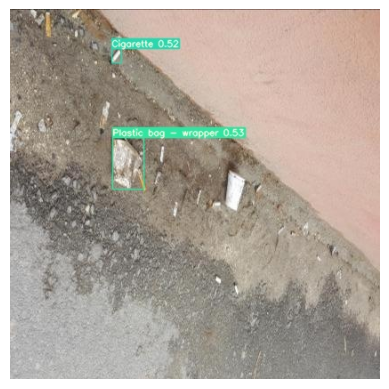

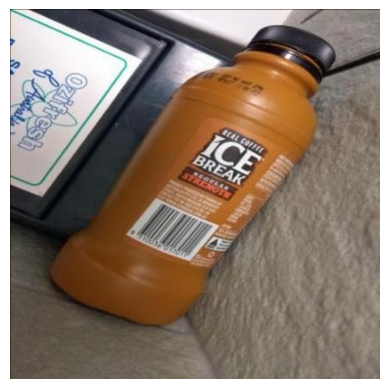

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

result_images = glob.glob('runs/detect/exp2/*.jpg')

# Tampilkan beberapa gambar hasil deteksi
for img_path in result_images[:5]:  # Menampilkan 5 gambar pertama
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

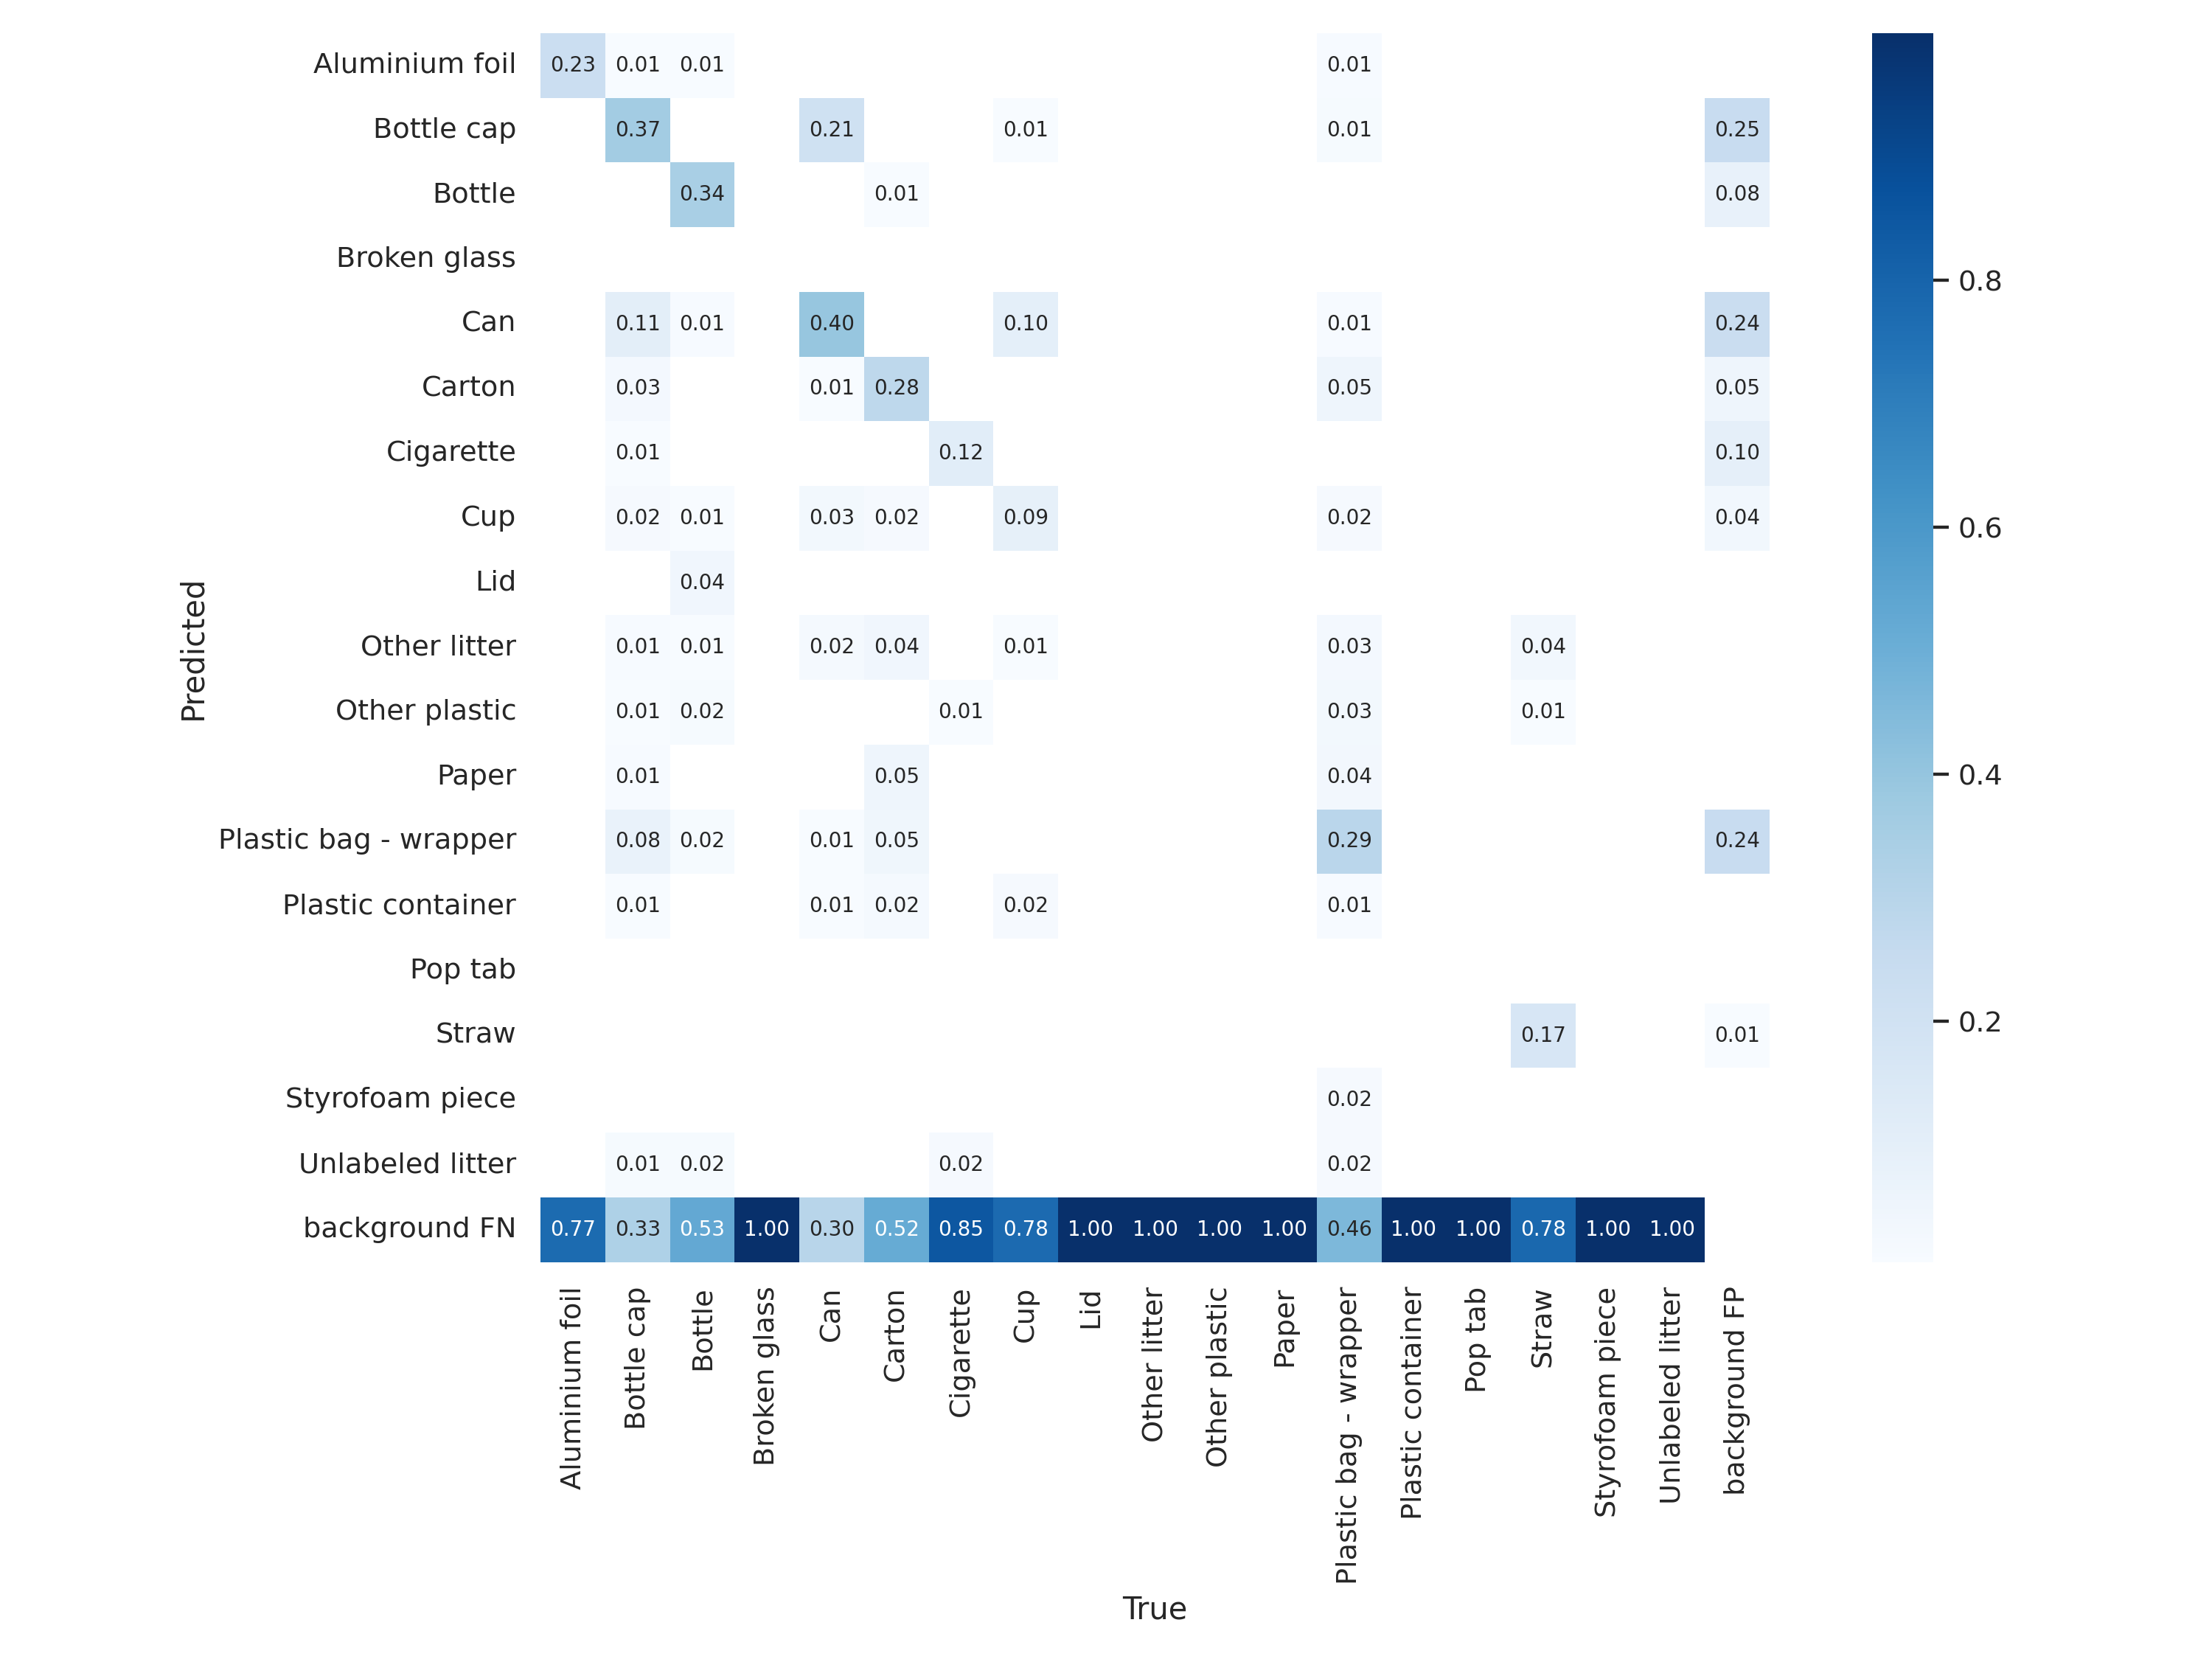

In [13]:
from IPython.display import Image, display
display(Image(filename='runs/test/exp2/confusion_matrix.png', width=750))

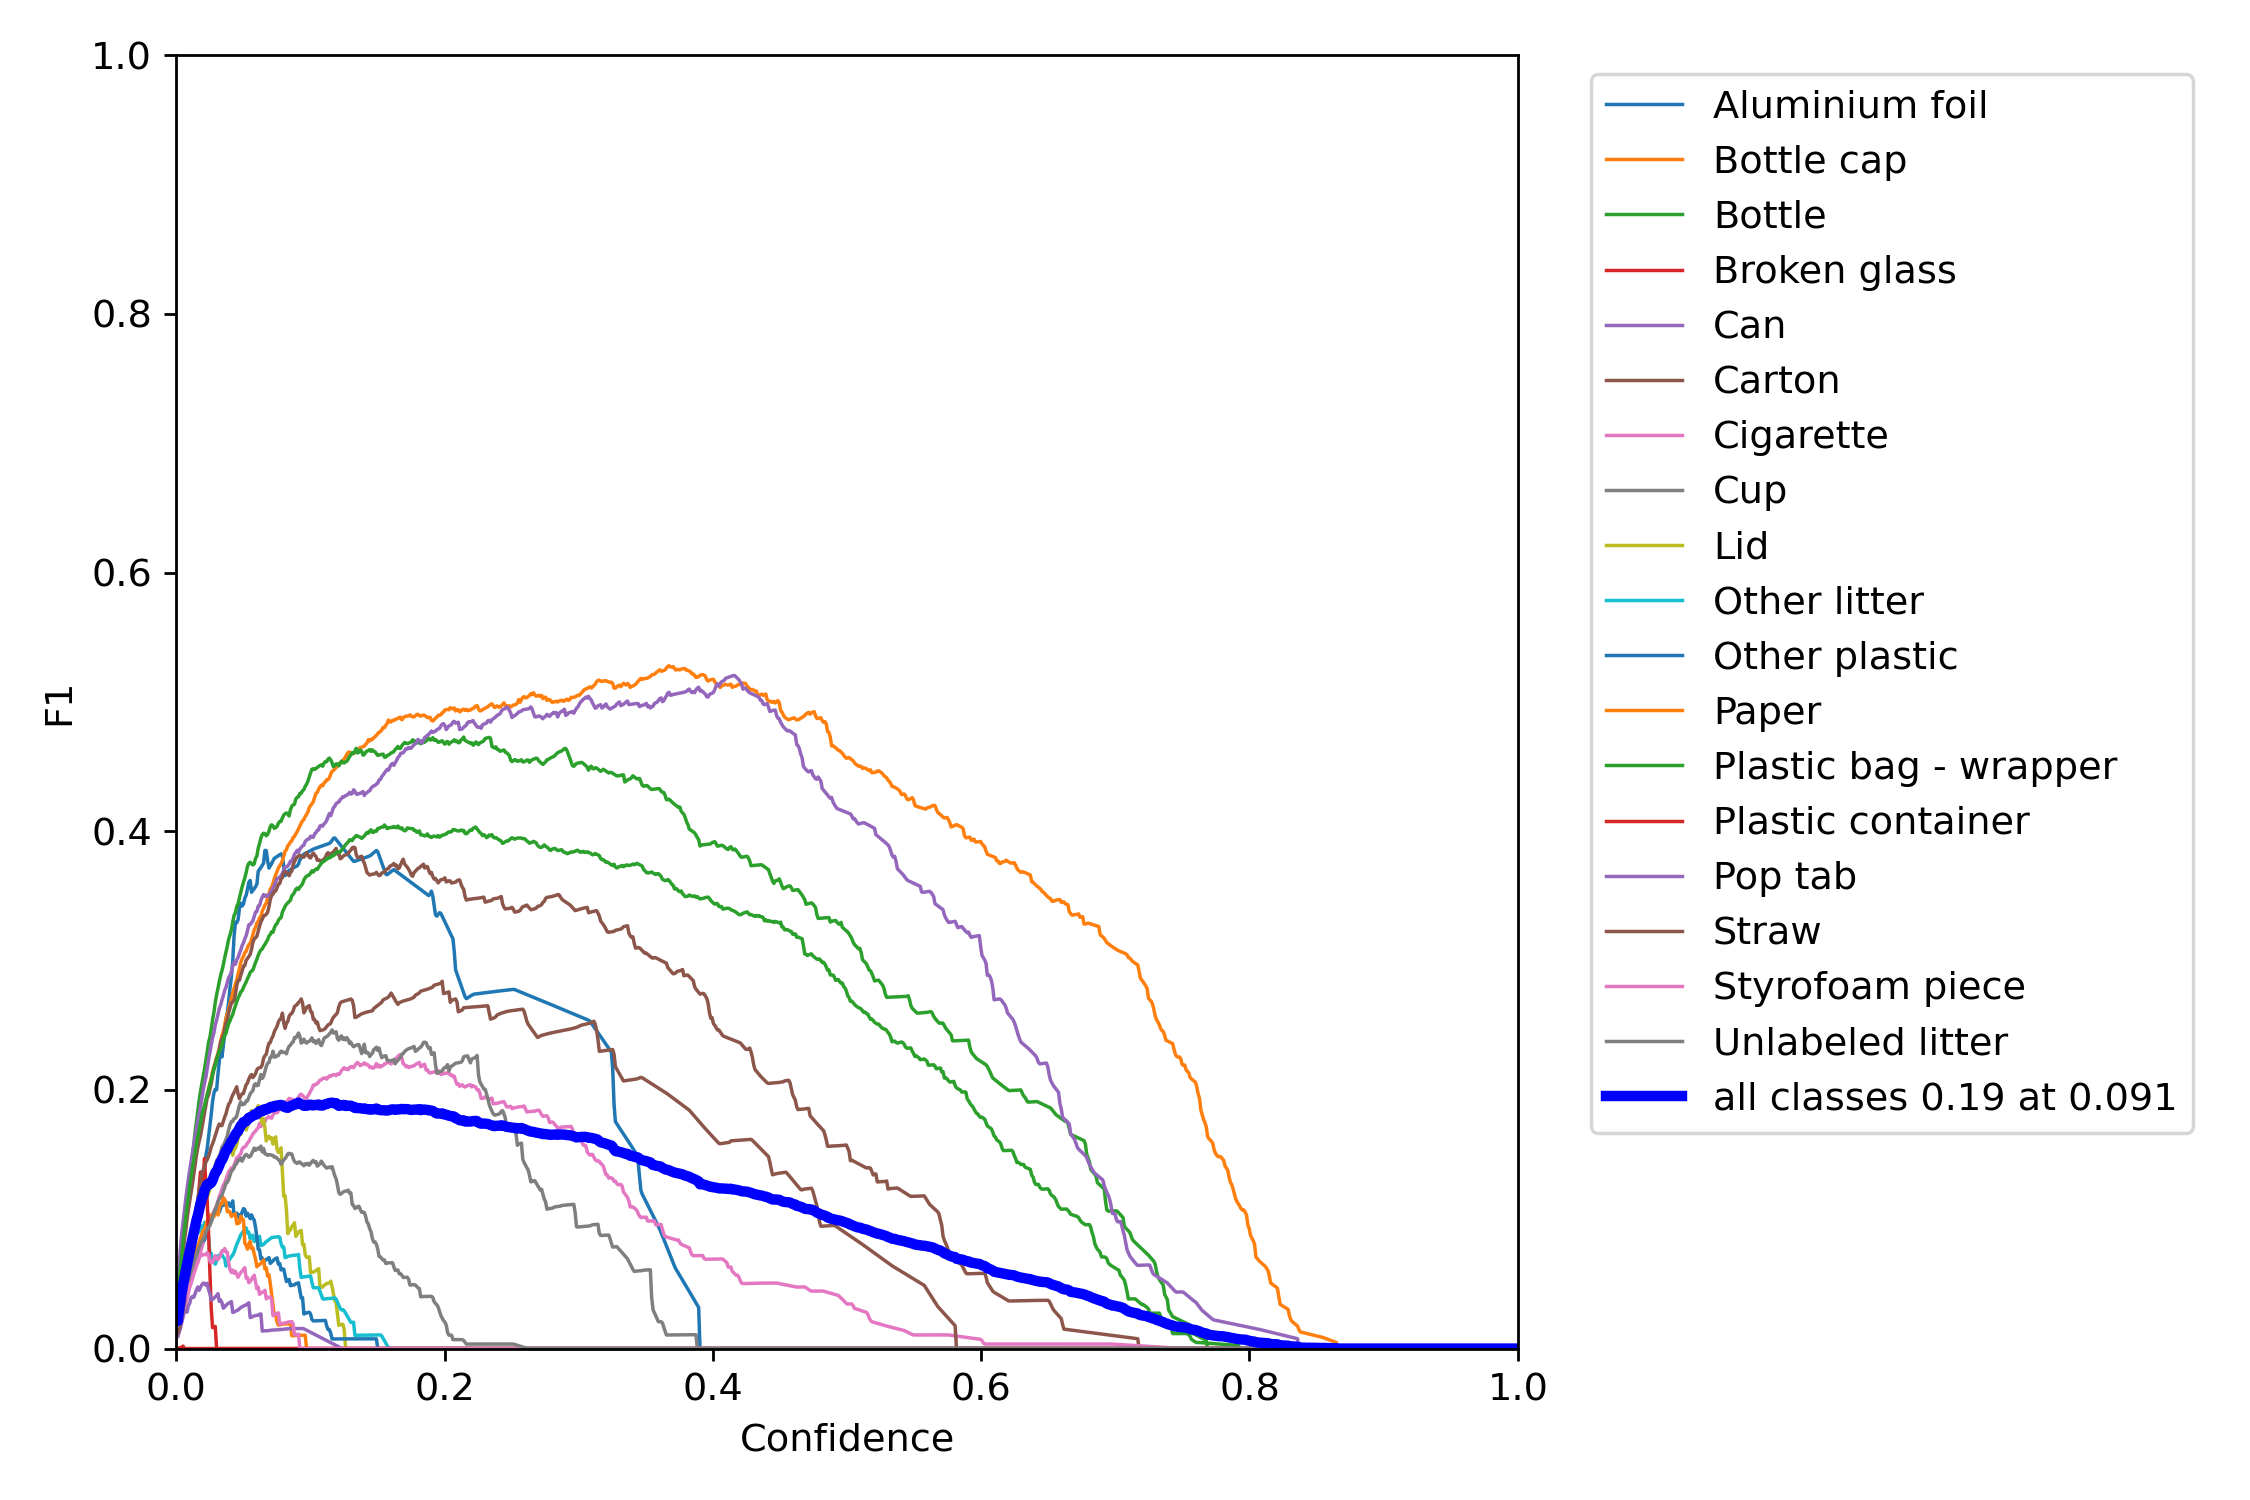

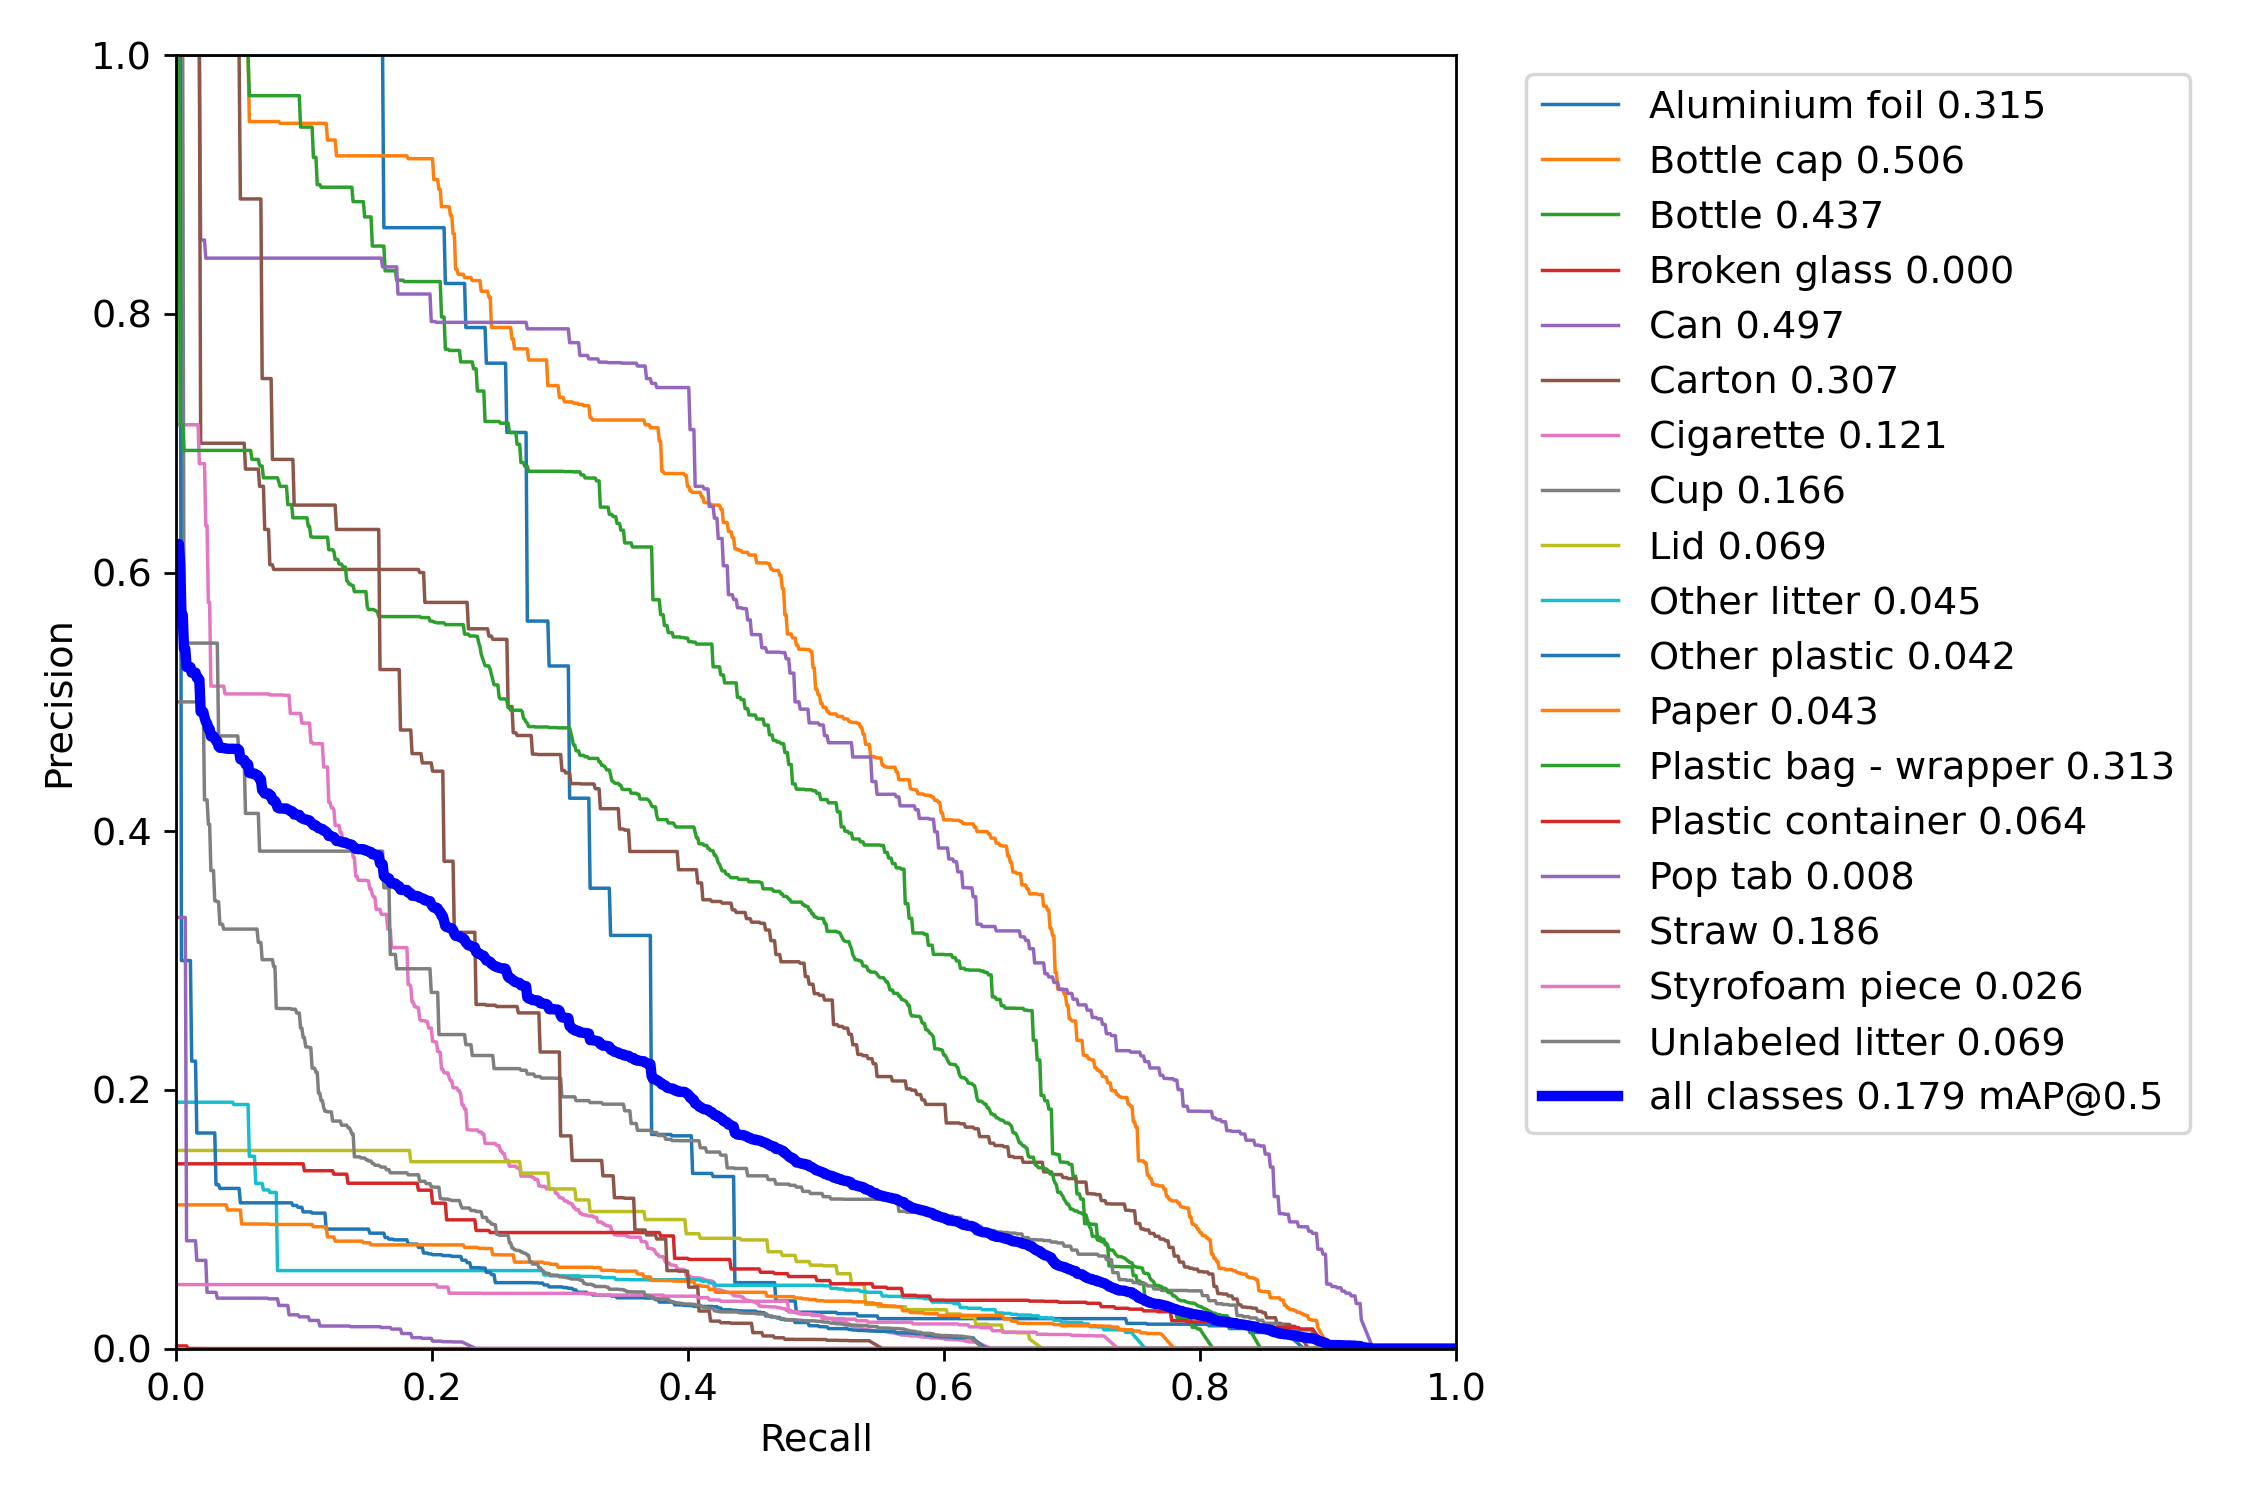

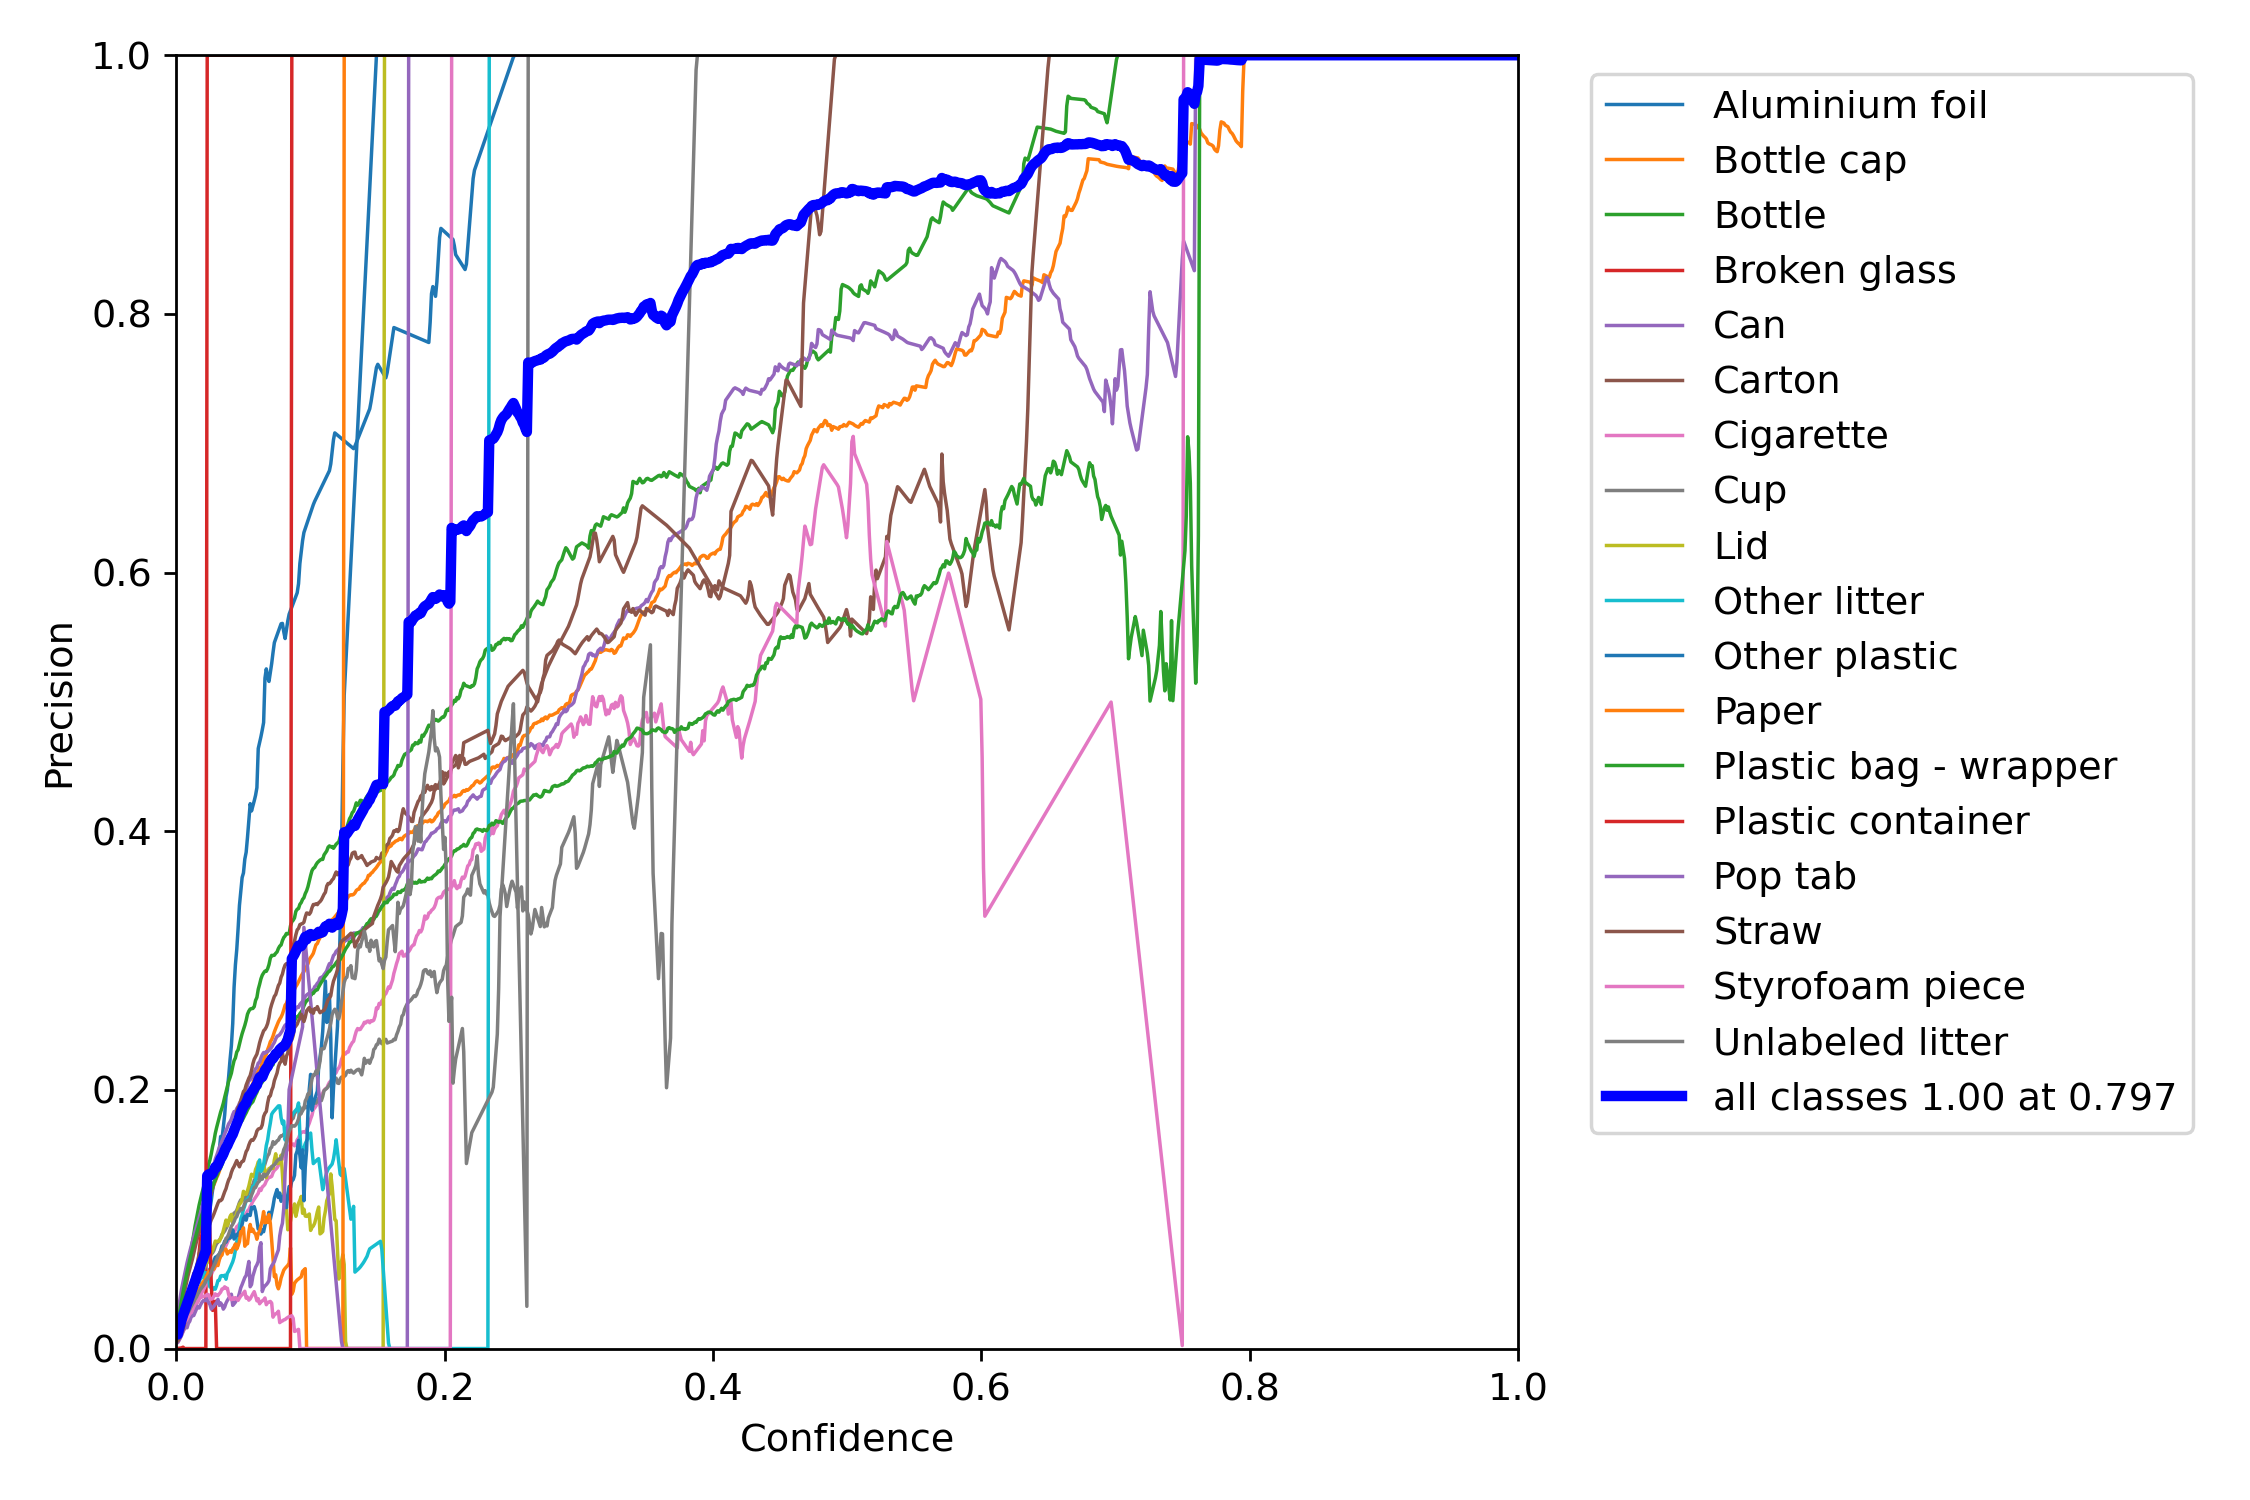

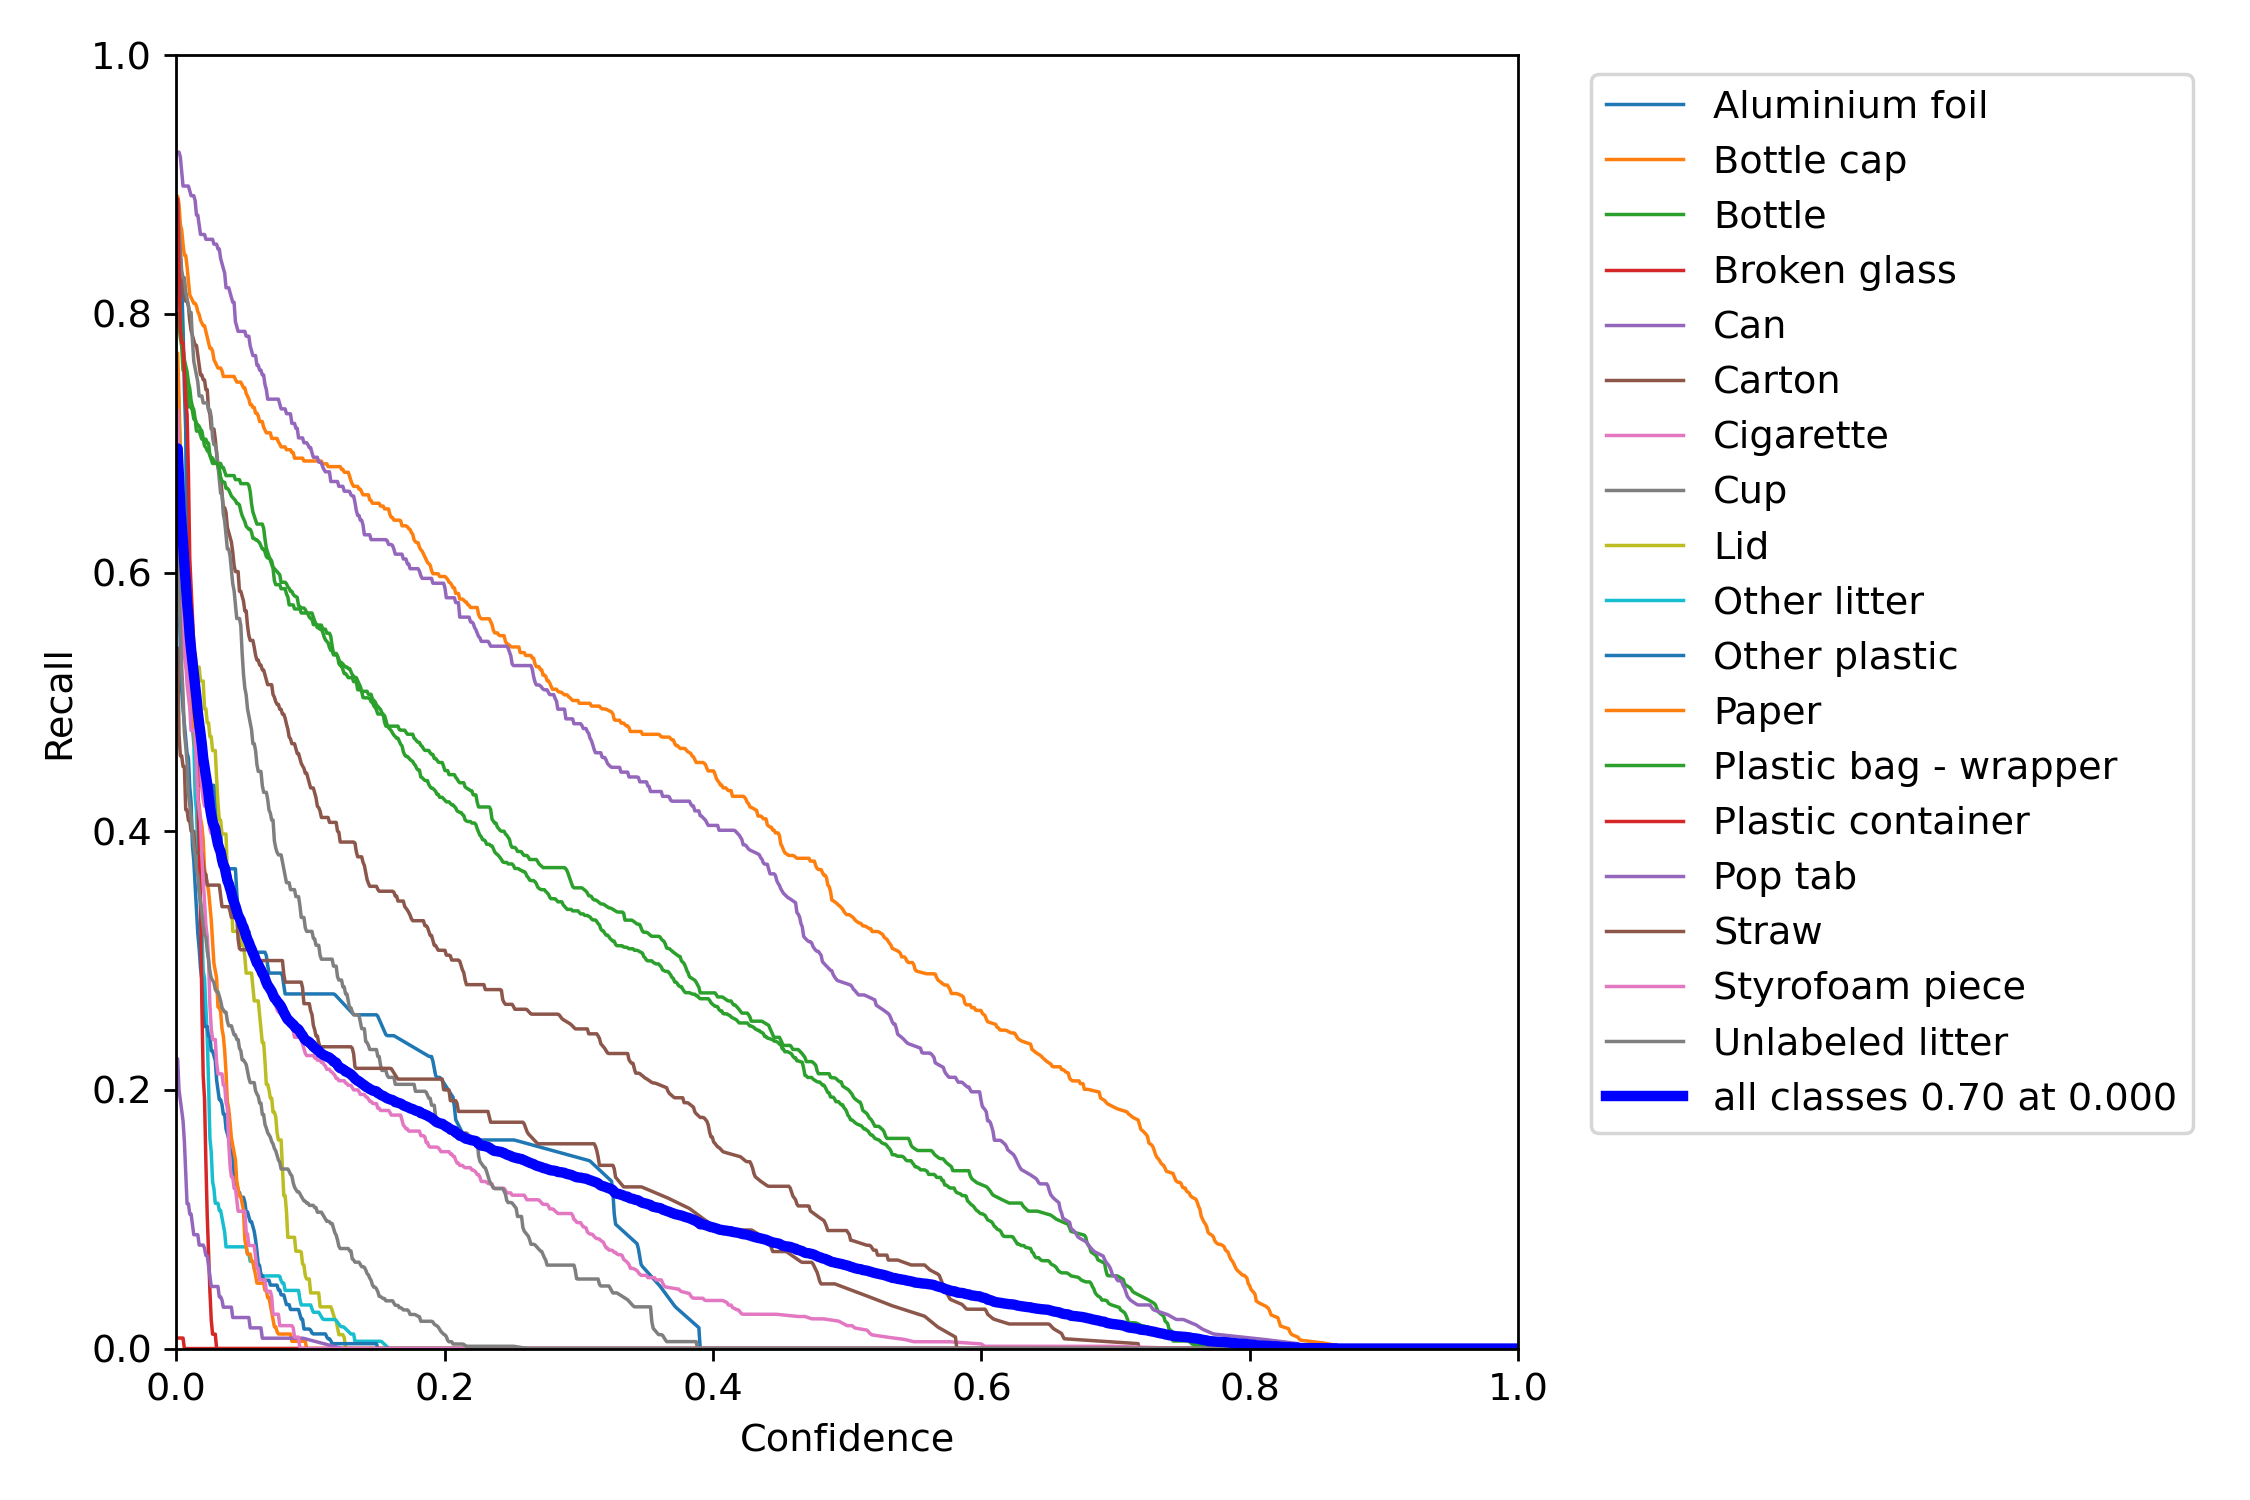

In [23]:
display(Image(filename='runs/test/exp2/F1_curve.png', width=400))
display(Image(filename='runs/test/exp2/PR_curve.png', width=400))
display(Image(filename='runs/test/exp2/P_curve.png', width=400))
display(Image(filename='runs/test/exp2/R_curve.png', width=400))

Labels


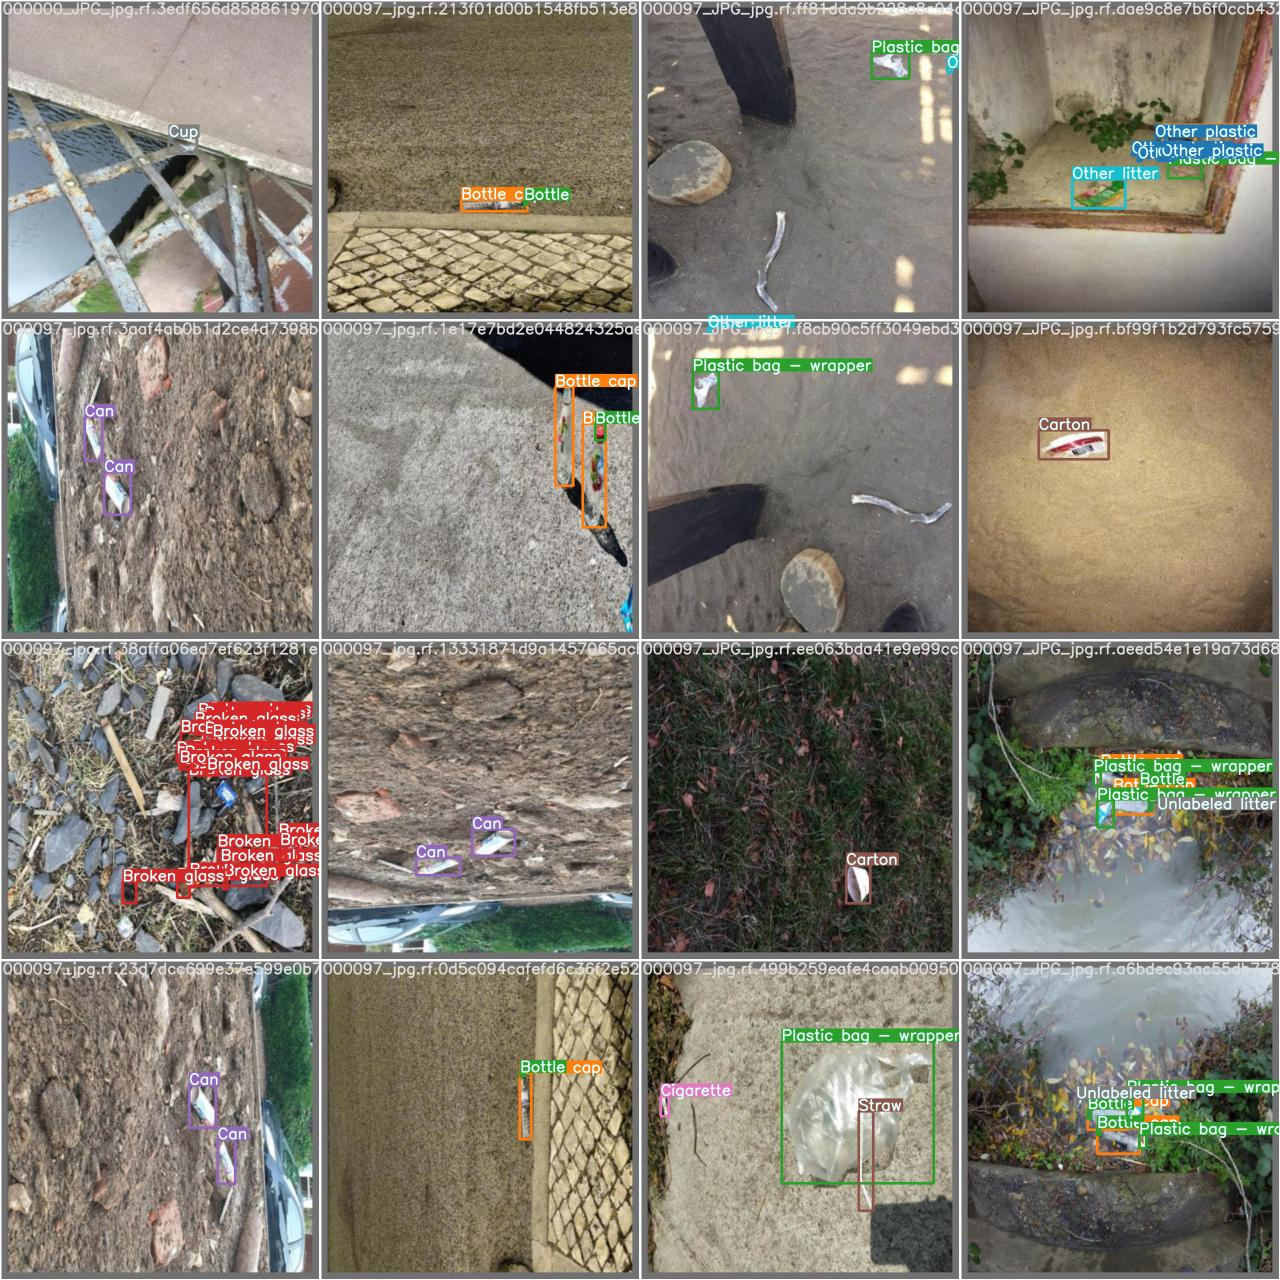

Predict


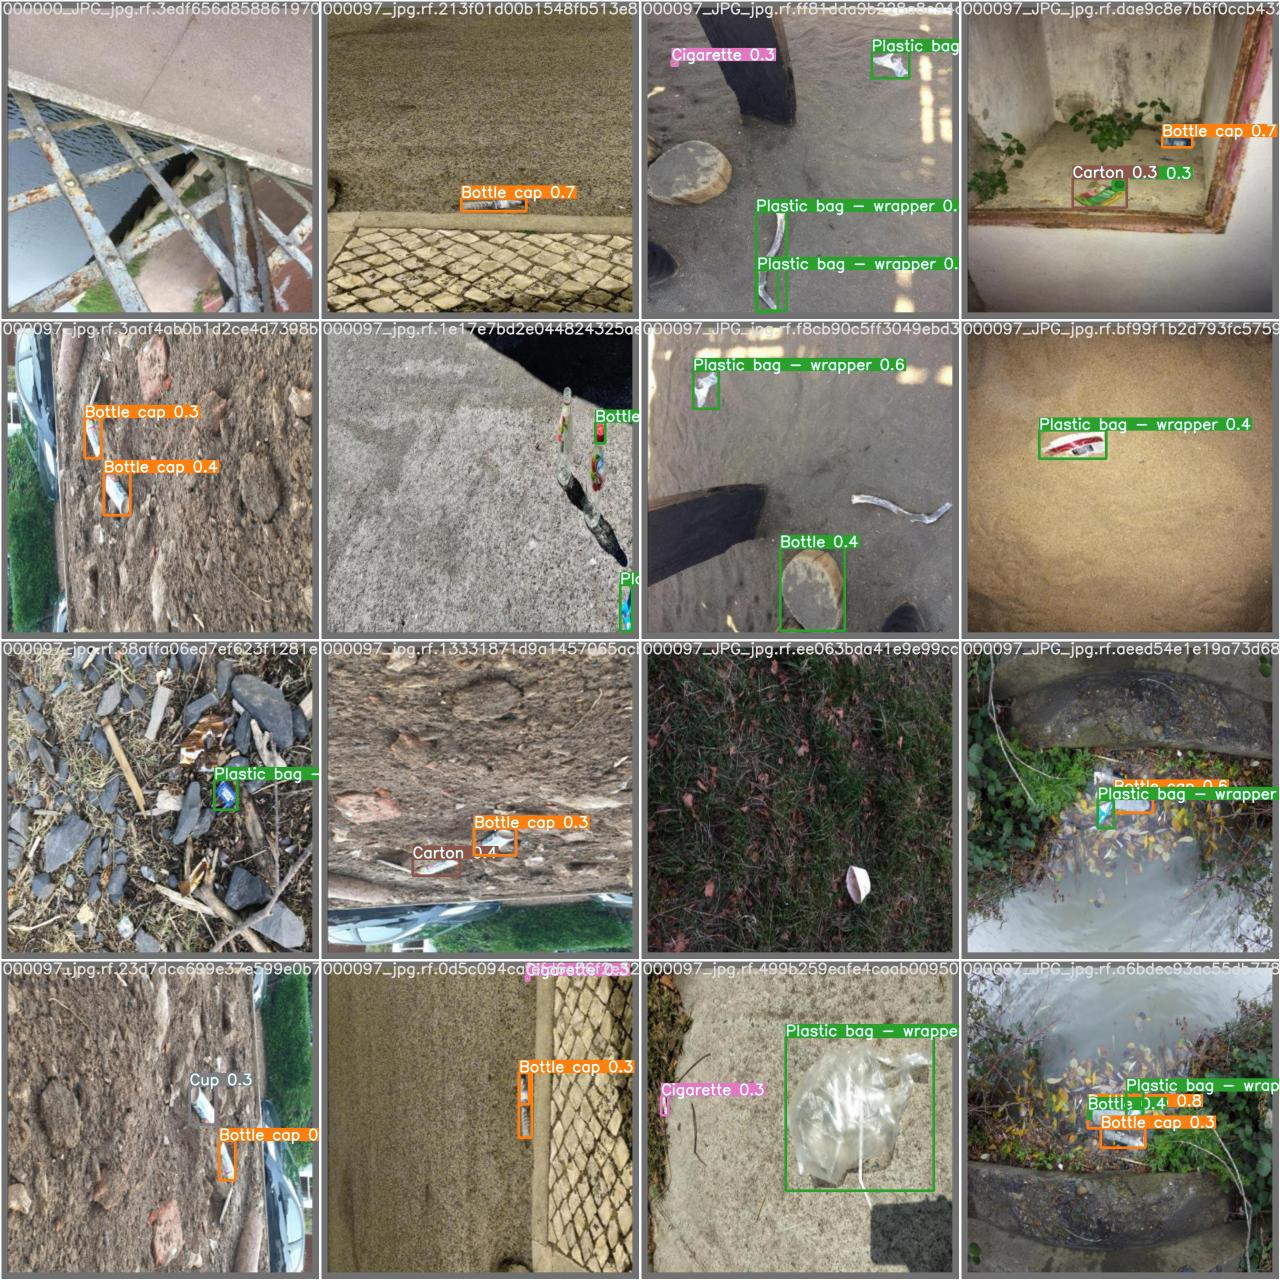

In [26]:
print('Labels')
display(Image(filename='runs/test/exp2/test_batch0_labels.jpg', width=750))
print('Predict')
display(Image(filename='runs/test/exp2/test_batch0_pred.jpg', width=750))